# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 15.3 MB/s 
     |████████████████████████████████| 166 kB 33.0 MB/s 
     |████████████████████████████████| 182 kB 64.3 MB/s 
     |████████████████████████████████| 63 kB 637 kB/s 
     |████████████████████████████████| 166 kB 57.0 MB/s 
     |████████████████████████████████| 162 kB 31.5 MB/s 
     |████████████████████████████████| 162 kB 66.5 MB/s 
     |████████████████████████████████| 158 kB 61.8 MB/s 
     |████████████████████████████████| 157 kB 57.0 MB/s 
     |████████████████████████████████| 157 kB 7.2 MB/s 
     |████████████████████████████████| 157 kB 20.6 MB/s 
     |████████████████████████████████| 157 kB 61.1 MB/s 
     |████████████████████████████████| 157 kB 20.3 MB/s 
     |████████████████████████████████| 157 kB 26.6 MB/s 
     |████████████████████████████████| 157 kB 37.1 MB/s 
     |████████████████████████████

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchvision.transforms.functional import InterpolationMode
from torchvision.models import resnet18
from torchvision.models import regnet_y_8gf
from torchvision.models import inception_v3
from torchvision.models import resnext50_32x4d
from torchvision.models import resnext101_32x8d
from torchvision.models import resnext101_64x4d
from torchvision.models import wide_resnet50_2
from torchvision.models import efficientnet_v2_s
from torchvision.models import efficientnet_b2
from torchvision.models import efficientnet_b5
from torchvision.models import EfficientNet_B5_Weights
from torchvision.models import efficientnet_b0
from torchvision.models import EfficientNet_B0_Weights
from torchvision.models import ResNeXt101_32X8D_Weights
from torchvision.models import vit_b_32
from torchvision.models import ViT_B_32_Weights

# You may add any imports you need

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-04 10:17:27--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-04 10:17:27--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc683f53e910e9f3383076bc3392.dl.dropboxusercontent.com/cd/0/get/BwH7QAHYXfYlBJJUP5-BqSMPD-yLaZGSE48FU-lpHsKhYGV6NIFcZEbCU-okhp88Qx-DcqXW0T-eX6_nxtGs167LI6vhW6aXjsntmodKW6grK3lGMFYkXbLoW4ezLUH2Xqyj_iT2Wld1CyNVaaRJF-O_o8Hvff-_cdaKjaN8D8knWg/file?dl=1# [following]
--2022-11-04 10:17:27--  https://uc683f53e910e9f3383076bc3392.dl.dropboxusercontent.com/cd/0/get/BwH7QAHYXfYlBJJUP5-BqSMPD-yLaZGSE48FU-lpHsKhYGV6NIFcZEbCU-okhp88Qx-DcqXW0T-eX6

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# Аугментации просто из семинара 3, только без ColorJitter'a: https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem03/sem03_solution.ipynb

import PIL

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

val_transform =  transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True) 
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1298: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. "


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

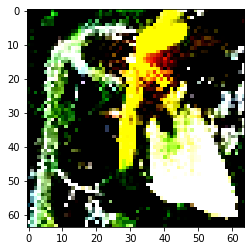

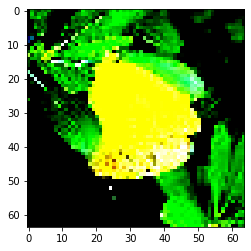

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Буду использовать непредобученный resnet18


### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()
        self.pretrained = pretrained

        if pretrained:
            # 
            self.model = resnet18(weights="DEFAULT")
            self.model.heads = nn.Identity()
            self.classifier = nn.Linear(768, 200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters())
        else:
            # 
            self.model = resnet18(weights=None, num_classes=200)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()
        self.save_hyperparameters()

    def forward(self, x) -> torch.Tensor:
        if self.pretrained:
            # 
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            # 
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        lambda_func = lambda epoch: 0.85 ** epoch
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=2)
        return {'optimizer': self.optimizer, 'lr_scheduler': scheduler, 'monitor': 'val_loss'}

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(monitor='accuracy', mode='max')

In [ ]:
seed_everything(123456)

wandb_logger = WandbLogger(project="HW_2", log_model='all')
device = "cuda:0"


model = YourModule(pretrained=False)


trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=30, auto_lr_find=False, callbacks=[checkpoint_callback])
#trainer.tune(model, train_dataloader, val_dataloader)
trainer.fit(model, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 8.0 M 
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
8.0 M     Trainable params
0         Non-trainable params
8.0 M     Total params
31.931    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
trainer.save_checkpoint('resnet18_with_ReduceLROnPlateau.pth')
wandb.save('resnet18_with_ReduceLROnPlateau.pth')

In [ ]:
wandb.finish()

### Валидация результатов задания

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [ ]:
seed_everything(123456)
#Загружаю свою лучшую модель

run = wandb.init()
artifact = run.use_artifact('kirill_zernikov/HW_2/model-2dlvoij5:v11', type='model')
artifact_dir = artifact.download()
run.join()

model_best = YourModule.load_from_checkpoint(artifact_dir + '/model.ckpt')


accuracy = evaluate_task(model_best, val_dataloader)


print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")
print("Моя лучшая accuracy:", accuracy)

wandb: Currently logged in as: kirill_zernikov. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact model-2dlvoij5:v11, 129.21MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:6.9
wandb: WARNING wandb.run.join() is deprecated, please use wandb.run.finish().


100%|██████████| 157/157 [00:12<00:00, 12.92it/s]

Оценка за это задание составит 9.17 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
# Использую трансформеры, как в доке (т.е. такие же, как авторы использовали при обучении своей модели):   https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_32.html
weights = ViT_B_32_Weights.DEFAULT
auto_transforms = weights.transforms()

In [ ]:
import PIL

# train_transform = transforms.Compose(
#     [
#         transforms.Resize(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]
# )

# val_transform =  transforms.Compose(
#     [
#         transforms.Resize(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]
# )

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=auto_transforms)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=auto_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True) 
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

### Модель (или просто импортируйте предобученную)

Буду использовать Vision Transformer -- vit_b_32. Нам их анонсировал Евгений Андреевич в начале семестра и в чате про них писали

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()
        self.pretrained = pretrained

        if pretrained:
            # 
            self.model = vit_b_32(weights="DEFAULT")
            self.model.heads = nn.Identity()
            self.classifier = nn.Linear(768, 200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters())
        else:
            # 
            self.model = vit_b_32(weights=None, num_classes=200)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()
        self.save_hyperparameters()

    def forward(self, x) -> torch.Tensor:
        if self.pretrained:
            # 
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            # 
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(monitor='accuracy', mode='max')

In [ ]:
seed_everything(123456)
#Просто тренировка без tuner'a learning_rate'a

wandb_logger = WandbLogger(project="HW_2", log_model='all')
device = "cuda:0"


model = YourModule(pretrained=True)


trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=30, auto_lr_find=False, callbacks=[checkpoint_callback])
#trainer.tune(model, train_dataloader, val_dataloader)
trainer.fit(model, train_dataloader, val_dataloader)

wandb: Currently logged in as: kirill_zernikov. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ResNet           | 86.7 M
1 | classifier | Linear           | 409 K 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
87.2 M    Trainable params
0         Non-trainable params
87.2 M    Total params
348.609   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
trainer.save_checkpoint('2_task_resnext101_32x8d_auto_trans.pth')
wandb.save('2_task_resnext101_32x8d_auto_trans.pth')

['./wandb/run-20221101_150304-3u0bmtik/files/2_task_resnext101_32x8d_auto_trans.pth']

In [ ]:
wandb.finish()

accuracy,▁▅██▇██
epoch,▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█
train_loss,█▆▄▄▄▃▃▂▂▂▂▂▂▂▂▂▃▂▂▃▂▂▂▂▁▂▃▂▂▁▂▂▂▂▁▁▁▁▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▃▁▁▁▂▂
accuracy,0.6392
epoch,7
train_loss,0.47903
trainer/global_step,10949
val_loss,1.55782


### Валидация результатов задания

In [ ]:
seed_everything(123456)
#Загружаю свою лучшую модель

run = wandb.init()
artifact = run.use_artifact('kirill_zernikov/HW_2/model-392a6p18:v2', type='model')
artifact_dir = artifact.download()
run.join()

model_best = YourModule.load_from_checkpoint(artifact_dir + '/model.ckpt')


accuracy = evaluate_task(model_best, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")
print("Моя лучшая accuracy:", accuracy)

wandb: Downloading large artifact model-392a6p18:v2, 335.44MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.2


Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth


  0%|          | 0.00/337M [00:00<?, ?B/s]

100%|██████████| 157/157 [00:33<00:00,  4.69it/s]

Оценка за это задание составит 9.69 баллов
0.8293


# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Ссылка на wandb: https://wandb.ai/kirill_zernikov/HW_2?workspace=user-kirill_zernikov , больше 30 моделей, все даже на графиках не отображаются). Если в начале run'a написано 2_task или task_2, то это модель для 2ой задачи, иначе для 1ой.

Сначала в 1ом задании использовал модель из семинара 4 (https://github.com/hse-ds/iad-deep-learning/blob/master/2022/seminars/sem04/sem04_solution.ipynb), с ней не получилось победить реснет18 (макс ~0.36) + были какие-то проблемы с кодом (не помню какие), в итоге перешел на реснет18. С ним довольно быстро вышел на ~0.38 (надо было использовать аугментации), потом долго не мог улучшить качество, пока не начал экспериментировать с scheduler'ами. Лучшее выдал ReduceLROnPlateau, читал про него тут: https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/ и тут: https://pytorch.org/docs/stable/optim.html

Пока делал 2ое задание прочитал в чате, что нужно найти модель, которая бы выдавала хотя бы 0.74 на 1ой эпохе, иначе до 0.84 не дойти. Перепробовал почти все нормальные модели из https://pytorch.org/vision/stable/models.html (с немножко разынми аугментациями, они почти не влияли на качество), пока не решил использовать vision transformer, с ним сразу 0.82 на 1ой эпохе)). Еще заметил, что ресайз сильно влияет на качество, без него все плохо, как у меня в первых тестах)))

В целом домашка не очень понравилась, было ощущение, что дергаешь за рычаги у черной коробки, пока не выпадет нужная циферка, т.к. не понятно как параметры модели могут повлиять на финальное качество(
